Part A: Encoding Categorical Variables
Load the dataset and display the first 5 rows

In [21]:
!pip install scikit-learn matplotlib

In [22]:
import pandas as pd


# Load the dataset
df = pd.read_csv('train.csv')

# Display the first 5 rows
print(df.head())

   Unnamed: 0    Id  MSSubClass MSZoning  LotFrontage  LotArea Street  \
0           0  1461          20       RH         80.0    11622   Pave   
1           1  1462          20       RL         81.0    14267   Pave   
2           2  1463          60       RL         74.0    13830   Pave   
3           3  1464          60       RL         78.0     9978   Pave   
4           4  1465         120       RL         43.0     5005   Pave   

  LotShape LandContour Utilities  ... ScreenPorch PoolArea PoolQC  Fence  \
0      Reg         Lvl    AllPub  ...         120        0    NaN  MnPrv   
1      IR1         Lvl    AllPub  ...           0        0    NaN  MnPrv   
2      IR1         Lvl    AllPub  ...           0        0    NaN  MnPrv   
3      IR1         Lvl    AllPub  ...           0        0    NaN  MnPrv   
4      IR1         HLS    AllPub  ...         144        0    NaN  MnPrv   

  MiscFeature MiscVal MoSold  YrSold  SaleType  SaleCondition  
0         NaN       0      6    2010    

In [23]:
# Identify categorical columns (object dtype)
categorical_cols = df.select_dtypes(include=['object']).columns

# List unique values for each categorical column
for col in categorical_cols:
    print(f"{col}: {df[col].unique()}")

MSZoning: ['RH' 'RL' 'RM' 'FV' 'C (all)']
Street: ['Pave' 'Grvl']
LotShape: ['Reg' 'IR1' 'IR2' 'IR3']
LandContour: ['Lvl' 'HLS' 'Bnk' 'Low']
Utilities: ['AllPub']
LotConfig: ['Inside' 'Corner' 'FR2' 'CulDSac' 'FR3']
LandSlope: ['Gtl' 'Mod' 'Sev']
Neighborhood: ['NAmes' 'Gilbert' 'StoneBr' 'BrDale' 'NPkVill' 'NridgHt' 'Blmngtn'
 'NoRidge' 'Somerst' 'SawyerW' 'Sawyer' 'NWAmes' 'OldTown' 'BrkSide'
 'ClearCr' 'SWISU' 'Edwards' 'CollgCr' 'Crawfor' 'Blueste' 'IDOTRR'
 'Mitchel' 'Timber' 'MeadowV' 'Veenker']
Condition1: ['Feedr' 'Norm' 'PosN' 'RRNe' 'Artery' 'RRNn' 'PosA' 'RRAn' 'RRAe']
Condition2: ['Norm' 'Feedr' 'PosA' 'PosN' 'Artery']
BldgType: ['1Fam' 'TwnhsE' 'Twnhs' 'Duplex' '2fmCon']
HouseStyle: ['1Story' '2Story' 'SLvl' '1.5Fin' 'SFoyer' '2.5Unf' '1.5Unf']
RoofStyle: ['Gable' 'Hip' 'Gambrel' 'Flat' 'Mansard' 'Shed']
RoofMatl: ['CompShg' 'Tar&Grv' 'WdShake' 'WdShngl']
Exterior1st: ['VinylSd' 'Wd Sdng' 'HdBoard' 'Plywood' 'MetalSd' 'CemntBd' 'WdShing'
 'BrkFace' 'AsbShng' 'BrkComm' 'Stu

In [24]:

from sklearn.preprocessing import LabelEncoder

# Apply Label Encoding to 'LotFrontage'
le = LabelEncoder()
df['Neighborhood_LF'] = le.fit_transform(df['Neighborhood'])

# Show the first 5 transformed values
print(df[['Neighborhood', 'Neighborhood_LF']].head())

  Neighborhood  Neighborhood_LF
0        NAmes               12
1        NAmes               12
2      Gilbert                8
3      Gilbert                8
4      StoneBr               22


In [25]:
# Apply One-Hot Encoding to 'Neighborhood'
ohe_df = pd.get_dummies(df['Neighborhood'], prefix='Neighborhood')

# Concatenate with original DataFrame
df_ohe = pd.concat([df, ohe_df], axis=1)

# Compare shapes
print("Original shape:", df.shape)
print("One-Hot Encoded shape:", df_ohe.shape)

Original shape: (1459, 81)
One-Hot Encoded shape: (1459, 106)


Part B: Simple Linear Regression
Split the data into training and test sets

In [26]:
from sklearn.model_selection import train_test_split

# Predictor and target
X = df[['LotArea']]
y = df['GarageArea']

# Split 80/20
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [27]:
from sklearn.linear_model import LinearRegression

# Train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Print learned parameters
print("Coefficient (slope):", model.coef_[0])
print("Intercept:", model.intercept_)

Coefficient (slope): 0.013872847106212814
Intercept: 342.00074985729555


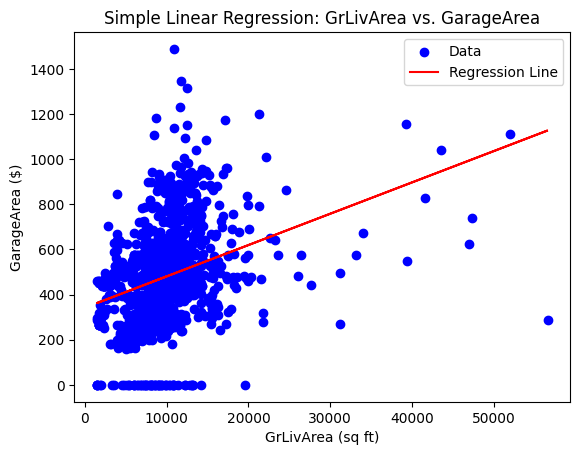

In [28]:
import matplotlib.pyplot as plt

# Plot scatter and regression line
plt.scatter(X_train, y_train, color='blue', label='Data')
plt.plot(X_train, model.predict(X_train), color='red', label='Regression Line')
plt.xlabel('GrLivArea (sq ft)')
plt.ylabel('GarageArea ($)')
plt.title('Simple Linear Regression: GrLivArea vs. GarageArea')
plt.legend()
plt.show()

In [29]:
# Predict on test set
preds = model.predict(X_test)

# Print first 5 predictions
print(preds[:5])

[441.88524902 476.69222241 477.35811907 428.5673158  517.78359554]


Part C: Regression Evaluation Metrics

In [30]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from math import sqrt

# Compute metrics
mae = mean_absolute_error(y_test, preds)
mse = mean_squared_error(y_test, preds)
rmse = sqrt(mse)
r2 = r2_score(y_test, preds)

print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R-squared:", r2)

MAE: 149.43935468797514
MSE: 36544.62477119797
RMSE: 191.16648443489765
R-squared: 0.08160263514582555


Part D: Multiple Linear Regression

In [31]:
# Select features
X_multi = df[['GrLivArea', 'OverallQual', 'YearBuilt']]

# Split
X_train_multi, X_test_multi, y_train_multi, y_test_multi = train_test_split(X_multi, y, test_size=0.2, random_state=42)

# Train
model_multi = LinearRegression()
model_multi.fit(X_train_multi, y_train_multi)

# Predict
preds_multi = model_multi.predict(X_test_multi)

# Metrics
mae_multi = mean_absolute_error(y_test_multi, preds_multi)
mse_multi = mean_squared_error(y_test_multi, preds_multi)
rmse_multi = sqrt(mse_multi)
r2_multi = r2_score(y_test_multi, preds_multi)

print("Multiple Linear Regression Metrics:")
print("MAE:", mae_multi)
print("MSE:", mse_multi)
print("RMSE:", rmse_multi)
print("R-squared:", r2_multi)

Multiple Linear Regression Metrics:
MAE: 121.22548521015325
MSE: 26099.477402337918
RMSE: 161.55332680677893
R-squared: 0.34409803300896036


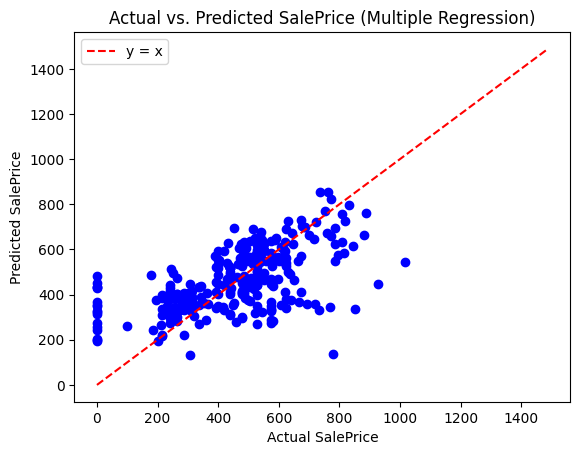

In [32]:
# Plot actual vs. predicted
plt.scatter(y_test_multi, preds_multi, color='blue')
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='red', linestyle='--', label='y = x')
plt.xlabel('Actual SalePrice')
plt.ylabel('Predicted SalePrice')
plt.title('Actual vs. Predicted SalePrice (Multiple Regression)')
plt.legend()
plt.show()